In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np 
tf.config.optimizer.set_jit(True)
print(tf.__version__)

2.1.0


In [2]:
fashion_mnist_data = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

Label	Class
0	T-shirt/top<br/>
1	Trouser<br/>
2	Pullover<br/>
3	Dress<br/>
4	Coat<br/>
5	Sandal<br/>
6	Shirt<br/>
7	Sneaker<br/>
8	Bag<br/>
9	Ankle boot<br/>

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

In [4]:
train_images[0].shape

(28, 28)

Ankle boot


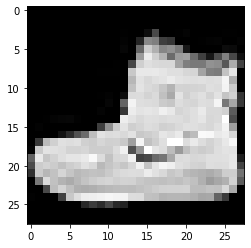

In [5]:
plt.imshow(train_images[0],cmap="gray")
print(class_names[train_labels[0]])

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

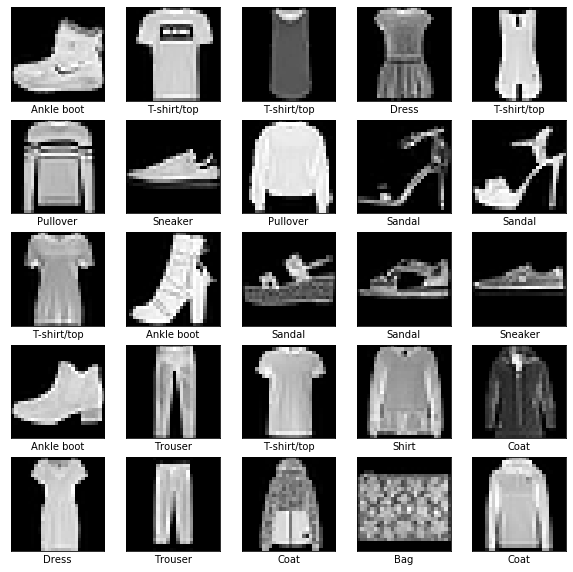

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap="gray")
    plt.xlabel(class_names[train_labels[i]])

In [8]:
trainX = train_images.reshape((train_images.shape[0], 28, 28, 1))
testX = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),padding="same",activation=tf.nn.relu,input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2),strides=2),
    keras.layers.Conv2D(64,(3,3),padding="same",activation=tf.nn.relu),
    keras.layers.MaxPooling2D((2,2),strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer="adam",loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [12]:
model.fit(trainX,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 756us/sample - loss: 0.4005 - accuracy: 0.8551
Epoch 2/10
60000/60000 [==============================] - 55s 924us/sample - loss: 0.2615 - accuracy: 0.9035
Epoch 3/10
60000/60000 [==============================] - 50s 826us/sample - loss: 0.2176 - accuracy: 0.9194
Epoch 4/10
60000/60000 [==============================] - 57s 943us/sample - loss: 0.1849 - accuracy: 0.9316
Epoch 5/10
60000/60000 [==============================] - 57s 946us/sample - loss: 0.1588 - accuracy: 0.9410
Epoch 6/10
60000/60000 [==============================] - 57s 949us/sample - loss: 0.1350 - accuracy: 0.9495
Epoch 7/10
60000/60000 [==============================] - 56s 937us/sample - loss: 0.1123 - accuracy: 0.9580
Epoch 8/10
60000/60000 [==============================] - 58s 968us/sample - loss: 0.0947 - accuracy: 0.9646
Epoch 9/10
60000/60000 [==============================] - 59s 977us/sample - loss: 0.0803 - accuracy: 0.9

In [13]:
model.evaluate(testX,test_labels)

10000/10000 [==============================] - 3s 256us/sample - loss: 0.3240 - accuracy: 0.9181


[0.3240239418797195, 0.9181]

In [14]:
predictions = model.predict(testX)

Trouser


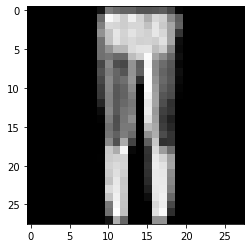

In [15]:
plt.imshow(test_images[3],cmap='gray')
print(class_names[np.argmax(predictions[3])])

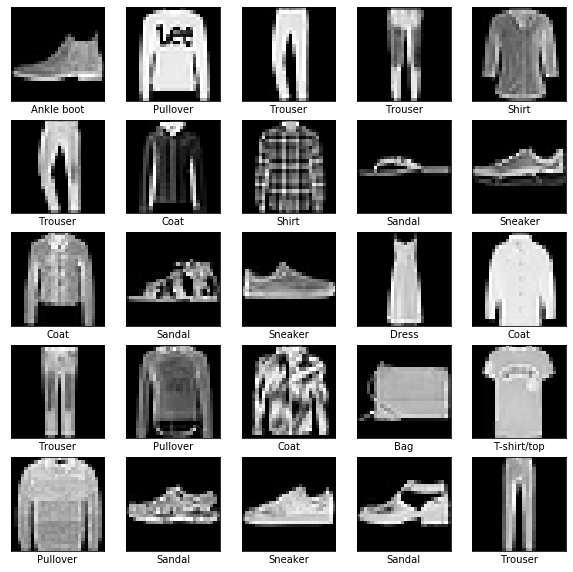

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap="gray")
    plt.xlabel(class_names[np.argmax(predictions[i])])